# Рекомендация тарифов

<h1> Комментарий ревьюера </h1>

Привет, Мхитар!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> А зачем нам в задаче классификации регрессионная модель и метрика? =)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Убрал ненужные библиотеки.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Хорошо
</div>
    

## Откройте и изучите файл

In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


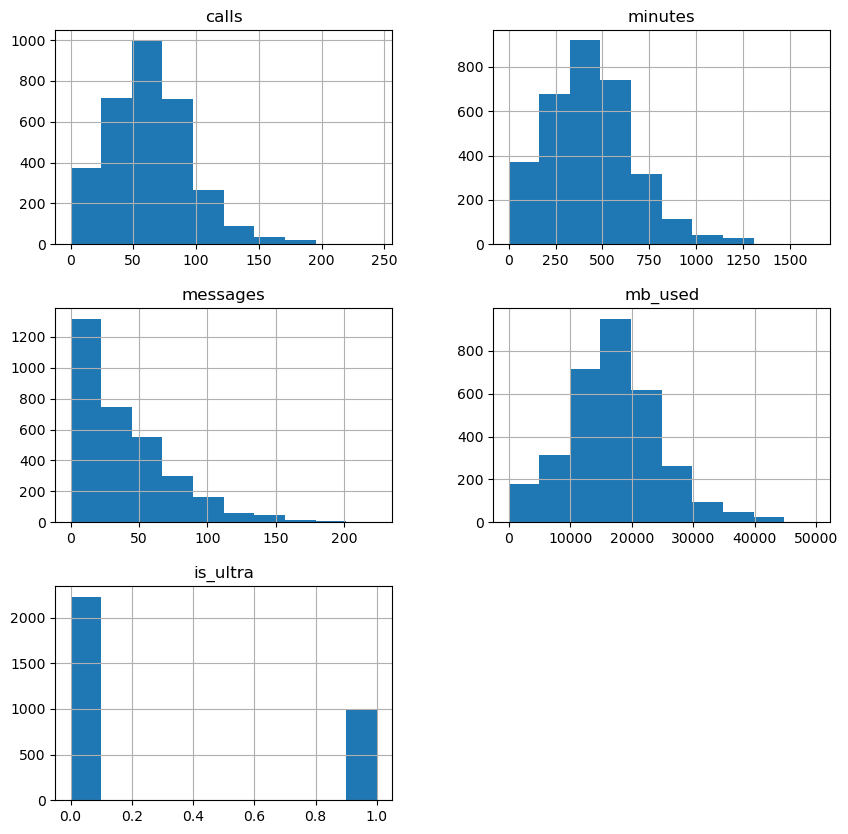

In [6]:
df.hist(figsize=(10,10));

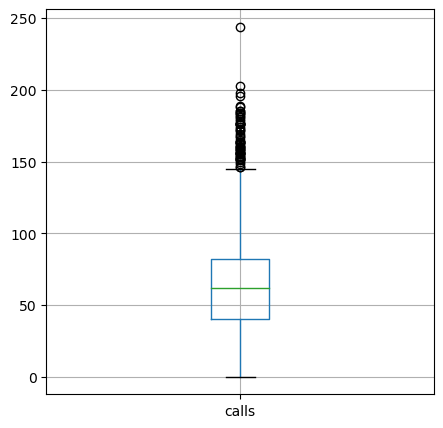

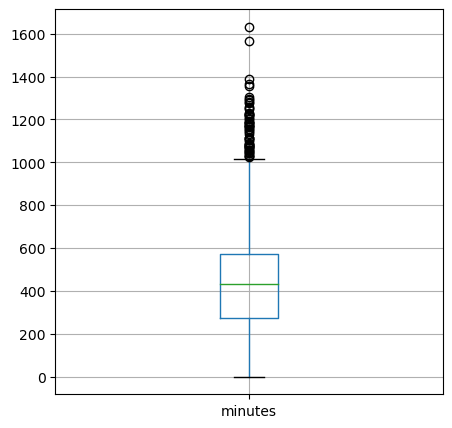

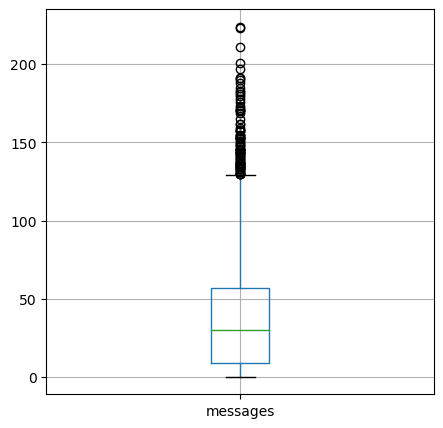

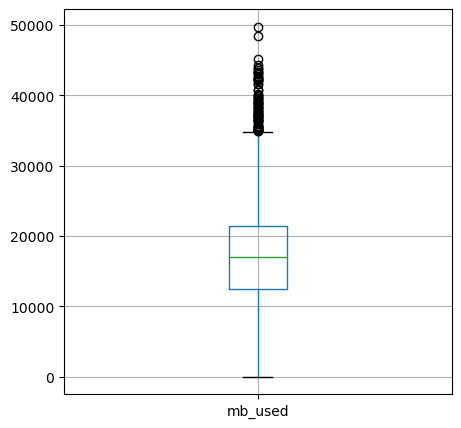

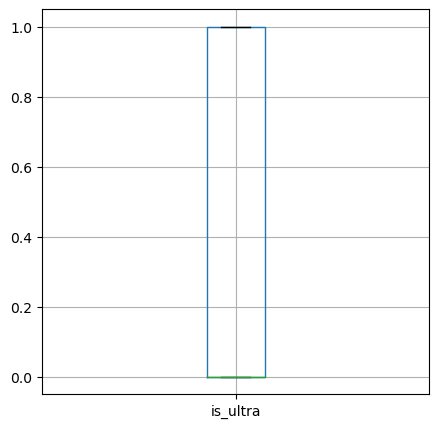

In [7]:
for column in df:
    plt.figure(figsize=(5,5))
    df.boxplot([column])

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Нет промежуточного вывода и твоих комментариев по поводу загруженных данных
</div>

**Вывод**: Исходные данные включают в себя 3214 записи. Проанализировав данные, видно, что пропуски отсутствуют, данные распределены нормально. Присутствуют небольшие выбросы в данных.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Промежуточный вывод добавил.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Хорошо
</div>

## Разбейте данные на выборки

In [8]:
df_train, df_test = train_test_split(df, test_size = 0.4, random_state=12345)
df_test, df_valid = train_test_split(df_test, test_size = 0.5, random_state=12345)

In [9]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']
features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

**Вывод**: Разбили исходные данные на 3 выборки: обучающая (60%), валидационная (20%) и тестовая (20%).

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Ты верно разделил по своей сути, но процент определен неверно. Ты отделил 40% на валидацию и тест, значит обучающая выборка 60%. А дальше ты от 40% отделяешь 20%, таким образом твой тест всего 8% от изначальных данных
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Разбил данные корректно.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Теперь верно =)
</div>

## Исследуйте модели

### Дерево решений

In [10]:
best_model_DT = None
best_result_DT = 0
max_depth = 0
for depth in range(1,21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    accuracy = model.score(features_valid, target_valid)
    if accuracy > best_result_DT:
        best_model_DT = model # сохраните наилучшую модель
        best_result_DT = accuracy #  сохраните наилучшее значение метрики accuracy на валидационных данных
        max_depth = depth
print(f'Точность наилучшей модели на валидационной выборке: {best_result_DT:.2f} \
      \nmax_depth: {max_depth}')

Точность наилучшей модели на валидационной выборке: 0.80       
max_depth: 7


### Случайный лес

In [11]:
best_model_RF = None
best_result_RF = 0
n_estim = 0
min_samples_leaf = 0
for est in range(1,11):
    for samples_leaf in range(1,31):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_leaf=samples_leaf)
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid)
        if accuracy > best_result_RF:
            best_model_RF = model
            best_result_RF = accuracy 
            n_estim = est
            min_samples_leaf = samples_leaf
print(f'Точность наилучшей модели на валидационной выборке: {best_result_RF:.2f} \
      \nn_estimators: {n_estim} \
      \nmin_samples_leaf: {min_samples_leaf}')

Точность наилучшей модели на валидационной выборке: 0.81       
n_estimators: 8       
min_samples_leaf: 8


**Вывод**: Наилучшей моделью оказалась RandomForest с точностью на валидационной выборке `0.81` со следующими гиперпараметрами: 
* n_estimators = 8      
* min_samples_leaf = 8

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> На будущее - для подбора оптимальных параметров можно использовать функции Gridsearchcv или Randomizedsearchcv. Статья про разницу между ними: https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c#:~:text=RandomSearchCV%20has%20the%20same%20purpose,parameters%20to%20improve%20your%20model.&text=The%20main%20difference%20between%20the,want%20to%20sample%20and%20test. И просто очень большая статья по их применению: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ Совсем обьемная статья с огромным количеством библиотек для подбора гиперпараметров: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide/. Ускоренная версия GridsearchCV https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c
</div>


In [12]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [14]:
parameters = {'n_estimators': range (1, 11),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,31, 2)}
model = RandomForestClassifier(random_state=12345)
grid = HalvingGridSearchCV(model, parameters, random_state=12345, scoring ='accuracy').fit(features_train, target_train)
accuracy = grid.best_score_
print(f'Точность наилучшей модели на валидационной выборке: {accuracy:.2f} \
      \nГиперпараметры: {grid.best_params_}')

Точность наилучшей модели на валидационной выборке: 0.81       
Гиперпараметры: {'max_depth': 11, 'min_samples_leaf': 1, 'n_estimators': 10}


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Опробовал функцию HalvingGridSearchCV для автоматического подбора гиперпараметров, однако в работе использовал результаты, полученные перебором параметров в цикле (модель best_model_RF).
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Здорово, что попробовал новый инструмент
</div>

## Проверьте модель на тестовой выборке

In [14]:
best_model_RF.predict(features_test)
accuracy = best_model_RF.score(features_test, target_test)
print(f'Точность работы модели на тестовой выборке {accuracy:.2f}')

Точность работы модели на тестовой выборке 0.79


## (бонус) Проверьте модели на адекватность

In [15]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy.fit(features_train, target_train)
accuracy = dummy.score(features_test, target_test)
print(f'Точность модели DummyClassifier для оценки адекватности полученной модели: '
f'{accuracy:.2f}')

Точность модели DummyClassifier для оценки адекватности полученной модели: 0.71


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Ты молодец, что решил использовать DummyClassifier для построения константной модели, но почему ты делаешь predict на валидации? Мы сравниваем тест с тестом
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Теперь верно)
</div>

In [16]:
target_test.value_counts()

0    454
1    189
Name: is_ultra, dtype: int64

**Вывод**: В результате работы исходные данные были разделены на 3 выборки (обучающая (60%), валидационна (20%) и тестовая (20%)) и была построена модель для задачи классификации, которая выберет подходящий тариф. Лучшей оказалась модель RandomForest со следующими гиперпараметрами `n_estimators = 8, min_samples_leaf = 8`. Что касаемо проверки модели на адекватность, использовал DummyClassifier c гиперпараметром strategy="most_frequent", который предсказывает наиболее часто встречающуюся метку в обучающем наборе. Наиболее часто встречающаяся метка в валидационной выборке 0 (454 значений), что составляет 0.71 от всей тестовой выборки. Сравнивая оценки классификатора RandomForest с фиктивным классификатором, мы приходим к выводу, что классификатор RandomForest, по сути, является хорошим классификатором для данных.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гиперпараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Спасибо тебе за проделанную работу, к сожалению, сейчас я не могу принять твой проект, поэтому придётся ещё немного поработать:
 
- добавь комментарии по поводу данных в разделе 1 (в нашей работе выводы и пояснения важны не меньше, чем код);
- измени пропорцию при разделении;
- сделай предикт у константной модели на тесте;
- поправь выводы в соответствии с изменениями.
    
До скорой встречи, если у тебя есть какие-то вопросы, то обязательно пиши =)
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил ошибки.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Теперь всё верно, молодец, что так быстро все исправил. Удачи в будущих проектах и работе, всё обязательно получится!
</div>